<a href="https://colab.research.google.com/github/Ripunjaykumar/Human_Activity_Recognitation/blob/main/Activity_Recognitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Drive

In [197]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Library Import

In [251]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,classification_report
from scipy import stats
from sklearn.svm import LinearSVC

#Reading Data

In [199]:
sitting = pd.read_csv('/content/gdrive/MyDrive/Activity_Recognition/sitting.csv')
sitting.head()

,x,y,z,class
0,0.008,-1.032,-0.324,sitting
1,0.004,-1.020,-0.336,sitting
2,0.012,-1.028,-0.316,sitting
3,-0.004,-1.028,-0.332,sitting
4,0.008,-1.036,-0.328,sitting


In [200]:
sitting.shape

(1795, 4)

In [201]:
sitting.columns

Index(['x', 'y', 'z', 'class'], dtype='object')

In [202]:
x_sitting = np.array(sitting['x'])

In [203]:
x_sitting

array([ 0.008,  0.004,  0.012, ..., -0.004, -0.34 ,  0.2  ])

In [204]:
y_sitting = np.array(sitting['y'])
z_sitting = np.array(sitting['z'])

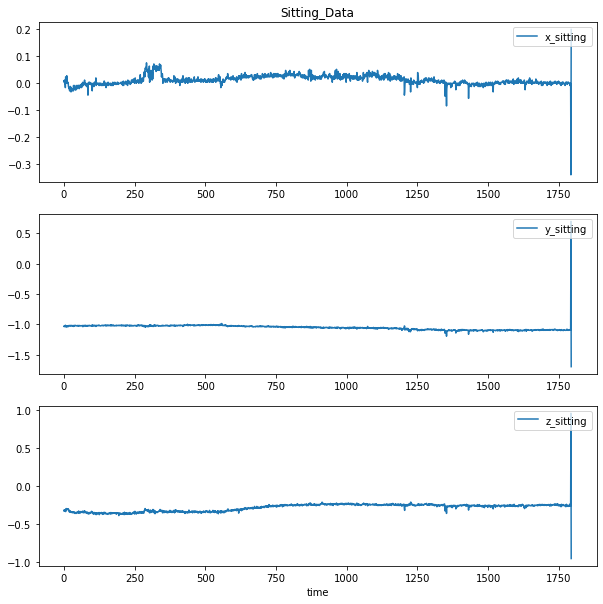

In [252]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(x_sitting, label='x_sitting')
plt.legend(loc='upper right')
plt.title('Sitting_Data')

plt.subplot(3, 1, 2)
plt.plot(y_sitting, label='y_sitting')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)
plt.plot(z_sitting, label='z_sitting')
plt.legend(loc='upper right')


plt.xlabel('time')
plt.show()

In [206]:
stairs = pd.read_csv('/content/gdrive/MyDrive/Activity_Recognition/stairs.csv')
stairs.head()

,x,y,z,class
0,0.000,0.000,0.000,stairs
1,0.096,-1.224,-0.052,stairs
2,-0.800,-0.356,0.132,stairs
3,0.264,-1.364,-0.152,stairs
4,-0.044,-1.764,0.232,stairs


In [207]:
stairs.shape

(1599, 4)

In [208]:
x_stairs = np.array(stairs['x'])
y_stairs = np.array(stairs['y'])
z_stairs = np.array(stairs['z'])

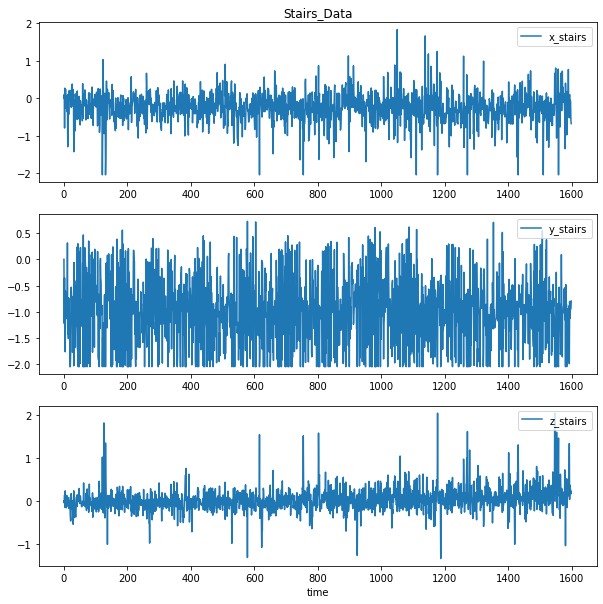

In [209]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(x_stairs, label='x_stairs')
plt.legend(loc='upper right')
plt.title('Stairs_Data')

plt.subplot(3, 1, 2)
plt.plot(y_stairs, label='y_stairs')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)
plt.plot(z_stairs, label='z_stairs')
plt.legend(loc='upper right')


plt.xlabel('time')
plt.show()

In [210]:
walking = pd.read_csv('/content/gdrive/MyDrive/Activity_Recognition/walking.csv')
walking.head()

,x,y,z,class
0,-1.036,-1.176,0.464,walking
1,-0.040,-0.728,-0.104,walking
2,-0.856,-0.916,0.172,walking
3,0.188,-1.012,-0.064,walking
4,-0.028,-1.588,0.112,walking


In [211]:
walking.shape

(1885, 4)

In [212]:
x_walking = np.array(walking['x'])
y_walking = np.array(walking['y'])
z_walking = np.array(walking['z'])

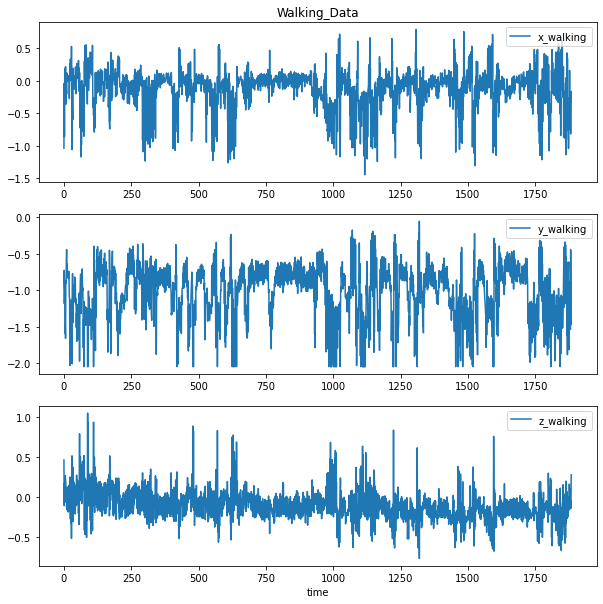

In [213]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(x_walking, label='x_walking')
plt.legend(loc='upper right')
plt.title('Walking_Data')

plt.subplot(3, 1, 2)
plt.plot(y_walking, label='y_walking')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)
plt.plot(z_walking, label='z_walking')
plt.legend(loc='upper right')


plt.xlabel('time')
plt.show()

#Extracting Features

In [214]:
def feature_extract(Window_x, Window_y, Window_z):

  mean_x = np.mean(Window_x)
  mean_y = np.mean(Window_y)
  mean_z = np.mean(Window_z)
  Mean = (mean_x + mean_y + mean_z)/3  

  std_x = np.std(Window_x)
  std_y = np.std(Window_y)
  std_z = np.std(Window_z)
  STD = (std_x+std_y+std_z)/3

  cov_x = mean_x/std_x
  cov_y = mean_y/std_y
  cov_z = mean_z/std_z
  COV = (cov_x + cov_y + cov_z)/3
  
  skew_x = stats.skew(Window_x)
  skew_y = stats.skew(Window_y)
  skew_z = stats.skew(Window_z)
  SKEW = (skew_x + skew_y + skew_z)/3

  kurtosis_x = stats.kurtosis(Window_x)
  kurtosis_y = stats.kurtosis(Window_y)
  kurtosis_z = stats.kurtosis(Window_z)
  KURTOSIS = (kurtosis_x+kurtosis_y+kurtosis_z)/3 

  magnitude = (Window_x**2+Window_y**2+Window_z**2)**0.5
  AVERAGE = np.mean(magnitude)


  zcr_x = sum(np.diff(Window_x>0))/len(Window_x)
  zcr_y = sum(np.diff(Window_y>0))/len(Window_y)
  zcr_z = sum(np.diff(Window_z>0))/len(Window_z)
  ZCR   =   (zcr_x+zcr_y+zcr_z)/3
  

  arr = np.array([Mean, STD, COV, SKEW, KURTOSIS, AVERAGE, ZCR])

  return arr


In [215]:
f_sitting = np.zeros((158,7))
f_stairs = np.zeros((158,7))
f_walking = np.zeros((158,7))

In [216]:
for i in range(1,159):
  Window1_x = x_sitting[(i*10)-9 : (i*10)+1]
  Window1_y = y_sitting[(i*10)-9 : (i*10)+1]
  Window1_z = z_sitting[(i*10)-9 : (i*10)+1]
  x1 = feature_extract(Window1_x,Window1_y,Window1_z)
  f_sitting[i-1] = x1

  Window2_x = x_stairs[(i*10)-9 : (i*10)+1]
  Window2_y = y_stairs[(i*10)-9 : (i*10)+1]
  Window2_z = z_stairs[(i*10)-9 : (i*10)+1]
  x2 = feature_extract(Window2_x,Window2_y,Window2_z)
  f_stairs[i-1] = x2

  Window3_x = x_walking[(i*10)-9 : (i*10)+1]
  Window3_y = y_walking[(i*10)-9 : (i*10)+1]
  Window3_z = z_walking[(i*10)-9 : (i*10)+1]
  x3 = feature_extract(Window3_x,Window3_y,Window3_z)
  f_walking[i-1] = x3


In [217]:
f_walking[157]

array([-4.50800000e-01,  1.73035296e-01, -3.21206424e+00,  2.74937190e-01,
       -1.22472747e-03,  1.29012327e+00,  2.33333333e-01])

In [218]:
df_sitting = pd.DataFrame(f_sitting, columns=['mean','std','cov','skew','kurtosis','average','zcr'])

In [219]:
df_sitting.head()

,mean,std,cov,skew,kurtosis,average,zcr
0,-0.446000,0.011729,-49.317182,6.824522e-03,-1.007275,1.077264,0.2
1,-0.450000,0.009757,-59.953988,-5.503372e-01,-0.548248,1.073339,0.1
2,-0.461467,0.005380,-110.133924,8.554663e-02,-0.130164,1.076926,0.0
3,-0.463333,0.006505,-81.501049,-3.846877e-01,-1.079472,1.079975,0.0
4,-0.463333,0.004918,-130.344004,2.818428e-16,-1.228395,1.079833,0.0


In [220]:
df_sitting.shape

(158, 7)

In [221]:
df_sitting.tail()

,mean,std,cov,skew,kurtosis,average,zcr
153,-0.452400,0.004644,-87.291622,0.015389,-0.887712,1.126199,0.133333
154,-0.452933,0.005286,-67.846361,-0.485233,-0.877586,1.126580,0.033333
155,-0.450933,0.004738,-146.825830,-0.122856,-0.048350,1.125257,0.133333
156,-0.450933,0.006025,-61.187254,-0.265653,-0.361681,1.127402,0.033333
157,-0.448133,0.004606,-106.960798,0.578815,-0.481075,1.119631,0.166667


In [222]:
df_sitting['activity'] = 'sitting'

In [223]:
df_sitting.head()

,mean,std,cov,skew,kurtosis,average,zcr,activity
0,-0.446000,0.011729,-49.317182,6.824522e-03,-1.007275,1.077264,0.2,sitting
1,-0.450000,0.009757,-59.953988,-5.503372e-01,-0.548248,1.073339,0.1,sitting
2,-0.461467,0.005380,-110.133924,8.554663e-02,-0.130164,1.076926,0.0,sitting
3,-0.463333,0.006505,-81.501049,-3.846877e-01,-1.079472,1.079975,0.0,sitting
4,-0.463333,0.004918,-130.344004,2.818428e-16,-1.228395,1.079833,0.0,sitting


In [224]:
df_stairs = pd.DataFrame(f_stairs, columns=['mean','std','cov','skew','kurtosis','average','zcr'])
df_stairs['activity'] = 'stairs'
df_stairs.head()

,mean,std,cov,skew,kurtosis,average,zcr,activity
0,-0.375200,0.270099,-1.049868,-0.217047,-0.283946,1.077804,0.366667,stairs
1,-0.475200,0.412639,-0.866603,-0.572444,0.479907,1.342196,0.366667,stairs
2,-0.409333,0.283022,-1.072700,-0.093297,-0.792431,1.090467,0.233333,stairs
3,-0.485067,0.417896,-1.022169,-0.354271,-0.535003,1.158219,0.266667,stairs
4,-0.392933,0.428609,-0.507172,0.204163,-1.002313,1.205113,0.500000,stairs


In [225]:
df_walking = pd.DataFrame(f_walking, columns=['mean','std','cov','skew','kurtosis','average','zcr'])
df_walking['activity'] = 'walking'
df_walking.head()

,mean,std,cov,skew,kurtosis,average,zcr,activity
0,-0.356400,0.276195,-0.815419,-0.620156,-0.417273,1.079486,0.400000,walking
1,-0.272400,0.117411,-2.391807,-1.051235,0.918816,0.828295,0.466667,walking
2,-0.454133,0.340851,-1.487366,-1.006216,0.408531,1.536833,0.300000,walking
3,-0.377733,0.200453,-2.047647,-0.591645,-0.247385,1.089698,0.300000,walking
4,-0.392667,0.186338,-1.351000,-0.068591,-0.964024,1.276381,0.500000,walking


#Concat Multiple DataFrames

In [250]:
frames = [df_sitting, df_stairs, df_walking]
df_result = pd.concat(frames , ignore_index=True)
df_result.tail()

,mean,std,cov,skew,kurtosis,average,zcr,activity
469,-0.436667,0.252641,-1.642023,-0.199947,-1.349846,1.174267,0.266667,walking
470,-0.315200,0.108642,-2.827135,0.014570,-1.364997,0.754810,0.200000,walking
471,-0.309333,0.089371,-3.075577,0.232874,-0.864292,0.805069,0.266667,walking
472,-0.527867,0.141406,-2.990266,-0.341012,-0.469191,1.321232,0.166667,walking
473,-0.450800,0.173035,-3.212064,0.274937,-0.001225,1.290123,0.233333,walking


In [228]:
df_result.index

RangeIndex(start=0, stop=474, step=1)

In [229]:
df_result.columns

Index(['mean', 'std', 'cov', 'skew', 'kurtosis', 'average', 'zcr', 'activity'], dtype='object')

In [230]:
df_result.to_csv('/content/gdrive/MyDrive/Activity_Recognition/data.csv', index = False)

In [231]:
data = pd.read_csv('/content/gdrive/MyDrive/Activity_Recognition/data.csv')

In [232]:
data.shape

(474, 8)

In [233]:
data.head()

,mean,std,cov,skew,kurtosis,average,zcr,activity
0,-0.446000,0.011729,-49.317182,6.824522e-03,-1.007275,1.077264,0.2,sitting
1,-0.450000,0.009757,-59.953988,-5.503372e-01,-0.548248,1.073339,0.1,sitting
2,-0.461467,0.005380,-110.133924,8.554663e-02,-0.130164,1.076926,0.0,sitting
3,-0.463333,0.006505,-81.501049,-3.846877e-01,-1.079472,1.079975,0.0,sitting
4,-0.463333,0.004918,-130.344004,2.818428e-16,-1.228395,1.079833,0.0,sitting


# Shuffle DataFrame

In [234]:
from sklearn.utils import shuffle
index = data.index
data_shuffled = shuffle(data)
data_shuffled.head(5)


,mean,std,cov,skew,kurtosis,average,zcr,activity
316,-0.356400,0.276195,-0.815419,-0.620156,-0.417273,1.079486,0.4,walking
458,-0.352667,0.102712,-2.874344,0.293347,-0.723413,0.926401,0.3,walking
67,-0.434000,0.005613,-146.194357,0.954339,0.558607,1.075074,0.0,sitting
166,-0.339600,0.336356,-0.787344,0.182089,-0.045271,0.912298,0.3,stairs
33,-0.433200,0.006717,-95.902469,0.620498,0.060063,1.075973,0.0,sitting


In [235]:
data_shuffled.index = index
data_shuffled.head(5)

,mean,std,cov,skew,kurtosis,average,zcr,activity
0,-0.356400,0.276195,-0.815419,-0.620156,-0.417273,1.079486,0.4,walking
1,-0.352667,0.102712,-2.874344,0.293347,-0.723413,0.926401,0.3,walking
2,-0.434000,0.005613,-146.194357,0.954339,0.558607,1.075074,0.0,sitting
3,-0.339600,0.336356,-0.787344,0.182089,-0.045271,0.912298,0.3,stairs
4,-0.433200,0.006717,-95.902469,0.620498,0.060063,1.075973,0.0,sitting


In [237]:
data_shuffled.isna().sum()

mean        0
std         0
cov         0
skew        0
kurtosis    0
average     0
zcr         0
activity    0
dtype: int64

In [238]:
data_shuffled.to_csv('/content/gdrive/MyDrive/Activity_Recognition/data_shuffled.csv', index = False)

In [239]:
#data_shuffled = pd.read_csv('/content/gdrive/MyDrive/Activity_Recognition/data_shuffled.csv')

#Model

In [240]:
feature = ['mean','std','cov','skew','kurtosis','average','zcr']
X = data_shuffled[feature]

In [241]:
y = data_shuffled['activity'].map({'sitting': 1, 'stairs': 2, 'walking': 3}).to_numpy()
y.dtype

dtype('int64')

In [242]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [243]:
X_train.shape , X_test.shape

((379, 7), (95, 7))

In [247]:
svm = LinearSVC(random_state = 42, C=1, penalty='l2' , dual=False)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy linear SVM : {}".format(accuracy_score(y_test,y_pred)))

Accuracy linear SVM : 0.9473684210526315


In [248]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.95      0.92      0.93        38
           3       0.91      0.94      0.93        34

    accuracy                           0.95        95
   macro avg       0.95      0.95      0.95        95
weighted avg       0.95      0.95      0.95        95



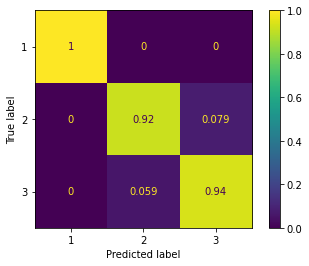

In [249]:
print(plot_confusion_matrix(svm,X_test,y_test,normalize='true'))